In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
#plt.style.use('seaborn-whitegrid')
#plt.style.use(['science', 'notebook', 'grid'])

## MOTION IN THE PLANE: PROJECTILE MOTION

Starting from **vectorial** Newtown equation

$\vec{F} = m \cdot \vec{a}$

We split the equation on x and y axes to get 2 second order differential equations

$\begin{cases}
     m a_x = 0\\
    m a_y = -mg
    \end{cases}$
    
that corresponds to the below system of first order diff. equations

$\begin{cases}
     a_x = 0\\
     a_y = -g
    \end{cases}$

REMEMBER: To solve the equation we have to specify   
- **INITIAL CONDITION OF SPACE**  $\vec{x} = (x_0, y_0)$
- **INITIAL CONDITION OF VELOCITY** $\vec{v_0} =(v_{0x}, v_{0y})$

In [203]:
# just run this cell
def dSdt_1(S, t, m, acc_gravity):
    # S = [y1,y2,y3,y4]  - vector of solutions
    # for projectile motion we have S = [x,vx, y, vy]  - vector of solutions   
    # t - independent time variable
    # acc_gravity, m - parameters
    x, vx, y, vy = S
    dSdt = [vx, 0, vy, acc_gravity]
    return dSdt    

## SET THE PARAMETERS

In [340]:
# 
# gravity acceleration (m/s^2)
g = -9.81     

#mass
m = 65  

# Spatial initial conditions (m)
x0 = 0
y0 = 1800

# Velocity initial condition (m/s)
vx0 = 80
vy0 = 0

# timeframe (s)
t0 = 0   # initial time
t1 = 20   # final time
n_interval = 101


## RUN BELOW TO SOLVE EQUATION

In [453]:
# ------------------------------------------
t = np.linspace(t0, t1, n_interval)
S0 = (x0,vx0,y0,vy0)

# Equation solver
sol = odeint(dSdt_1, S0, t, args=(m, g))

# Solutions 
x = sol[:,0]   # Equation of motion for position x
vx = sol[:,1]  # velocity law for vx component
y = sol[:,2]  # Equation of motion for position y
vy = sol[:,3]  # velocity law for vy component

## PLOT SOLUTION

Text(0, 0.5, 'y  (m)')

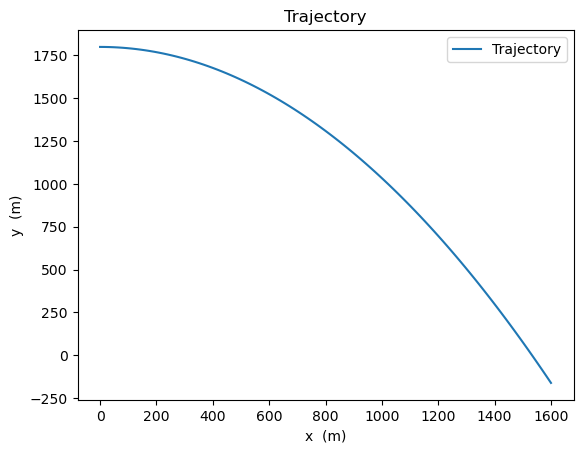

In [356]:
# Trajectory
plt.plot(x,y, label="Trajectory")

plt.legend()
plt.title("Trajectory")
plt.xlabel("x  (m)")
plt.ylabel("y  (m)")

Text(0, 0.5, 'v (m/s)')

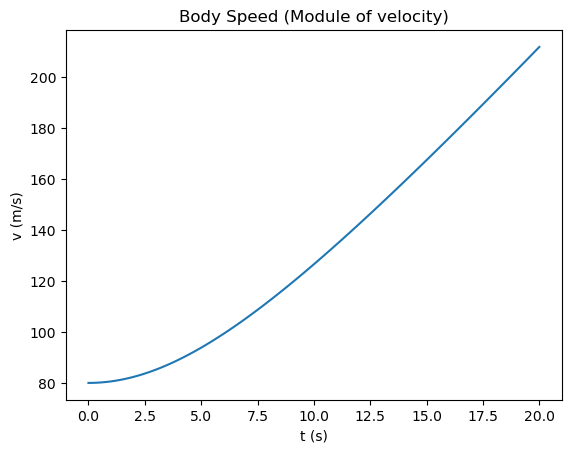

In [461]:
# Speed
speed = np.sqrt(vx**2+vy**2)
plt.plot(t,speed, label="Speed")
plt.title("Body Speed (Module of velocity)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

Text(0, 0.5, 'x(t), y(t)')

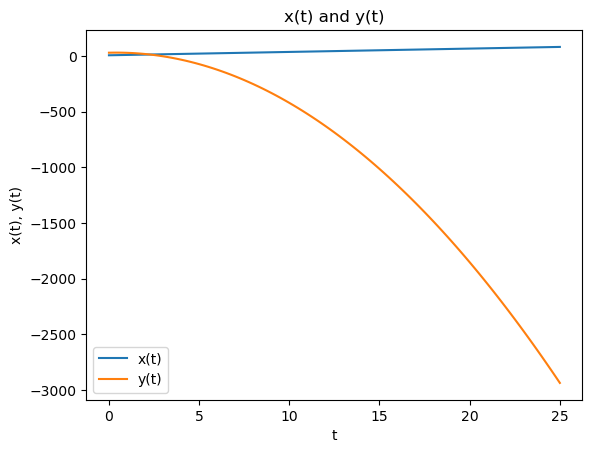

In [283]:
# X axes - time-space and time-velocity diagram 
plt.plot(t,x, label="x(t)")
plt.plot(t,y, label="y(t)")
plt.legend()
plt.title("x(t) and y(t)")
plt.xlabel("t  (s)")
plt.ylabel("x(t), y(t)")

Text(0, 0.5, 'vx(t),vy(t)')

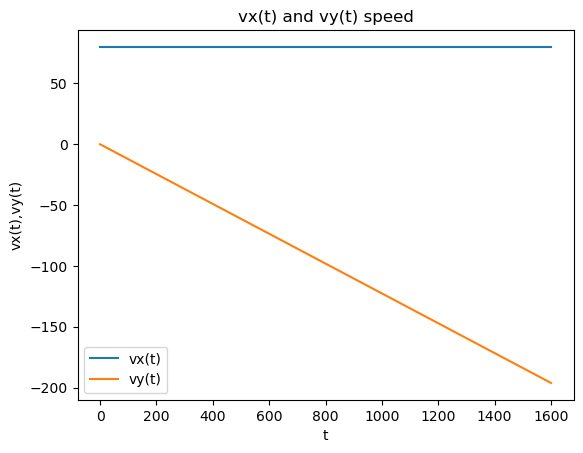

In [358]:
# Y axes - time-space and time-velocity diagram 
plt.plot(x,vx, label="vx(t)")
plt.plot(x,vy, label="vy(t)")
plt.legend()
plt.title("vx(t) and vy(t) speed")
plt.xlabel("t")
plt.ylabel("vx(t),vy(t)")

/var/folders/s5/gcy6hmzn6zgd1mwk8vv9g7gr0000gn/T/ipykernel_95067/1048784173.py:13: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  ball.set_data(x[frame], y[frame])  # Aggiorna la posizione della pallina


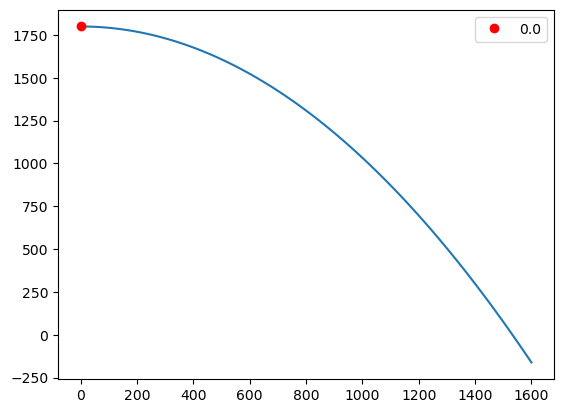

In [362]:

# Creazione della figura e dell'asse
fig, ax = plt.subplots()

# Disegna la traiettoria
#line, = ax.plot(x_sol, y_sol, 'o-')
line, = ax.plot(x, y)

# Crea la pallina
ball, = ax.plot(x[0], y[0], 'o', color='red', label=t[0])

# Funzione di aggiornamento per l'animazione
def update(frame):
    ball.set_data(x[frame], y[frame])  # Aggiorna la posizione della pallina
    ball.set_label(t[frame])

ax.legend()
# Creazione dell'animazione
animation = FuncAnimation(fig, update, frames=len(x), interval=100, repeat=True)

# Converti l'animazione in un elemento HTML
html_animation = animation.to_jshtml()

# Visualizza l'animazione
HTML(html_animation)

## MOTION IN THE PLANE: PROJECTILE MOTION WITH AIR FRICTION

Starting from **vectorial** Newtown equation

$\vec{F} = m \cdot \vec{a}$

We want to study the motion of free body with air fricton  

Air friction is proportional to the velocity of the body in respect with the following rule (for low velocity):  

$\vec{F_d} = -k \cdot \vec{v}$

k è una costante di proporzionalità che rappresenta la forza di resistenza viscosa esercitata sull'oggetto per unità di velocità. Il valore di 𝑘 dipende da diversi fattori, tra cui le proprietà del fluido (in questo caso, l'aria), la forma e la dimensione dell'oggetto. 

We split the equation on x and y axes to get 2 second order differential equations

$\begin{cases}
     m a_x = -kv_x\\
    m a_y = -mg - kv_y
    \end{cases}$
    
that corresponds to the below system of first order diff. equations

$\begin{cases}
     a_x = -\frac{k}{m} v_x\\
     a_y = -g -\frac{k}{m} v_y
    \end{cases}$

REMEMBER: To solve the equation we have to specify   
- **INITIAL CONDITION OF SPACE**  $\vec{x} = (x_0, y_0)$
- **INITIAL CONDITION OF VELOCITY** $\vec{v_0} =(v_{0x}, v_{0y})$

In [364]:
# just run this cell
def dSdt_2(S, t, m, acc_gravity,k):
    # S = [y1,y2,y3,y4]  - vector of solutions
    # for projectile motion we have S = [x,vx, y, vy]  - vector of solutions   
    # t - independent time variable
    # acc_gravity, m - parameters
    x, vx, y, vy = S
    dSdt = [vx, -k/m*vx, vy, acc_gravity-k/m*vy]
    return dSdt    

In [418]:
# 
# gravity acceleration (m/s^2)
g = -9.81     

#mass
m = 65

#viscosity kg/s
k=14.3   # approssimazione della viscosità per un paracadutista

# Spatial initial conditions (m)
x0 = 0
y0 = 1800

# Velocity initial condition (m/s)
vx0 = 80
vy0 = 0

# timeframe (s)
t0 = 0   # initial time
t1 = 20   # final time
n_interval = 101

In [420]:
# ------------------------------------------
t = np.linspace(t0, t1, n_interval)
S0 = (x0,vx0,y0,vy0)

# Equation solver
sol = odeint(dSdt_2, S0, t, args=(m, g, k))

# Solution
x1 = sol[:,0]
vx1 = sol[:,1]
y1 = sol[:,2]
vy1 = sol[:,3]

Text(0, 0.5, 'y1')

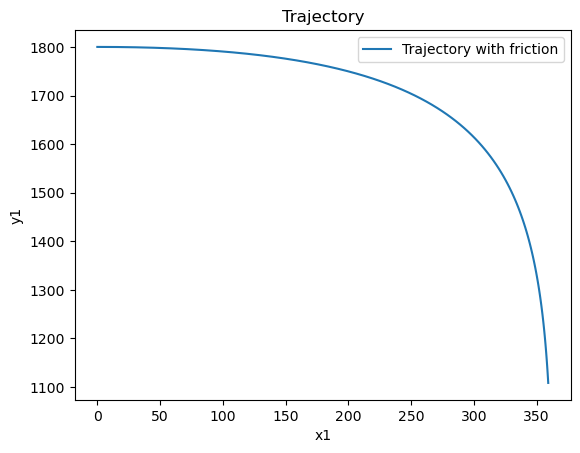

In [455]:
# Trajectory
plt.plot(x1,y1, label="Trajectory with friction")

plt.legend()
plt.title("Trajectory")
plt.xlabel("x1")
plt.ylabel("y1")

Text(0, 0.5, 'v1(t)')

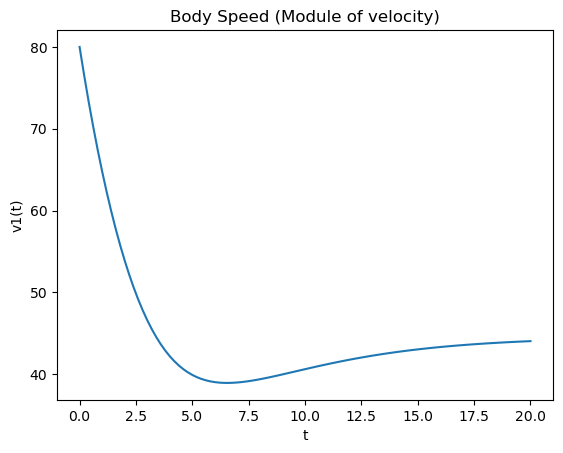

In [463]:
# Speed
speed = np.sqrt(vx1**2+vy1**2)
plt.plot(t,speed, label="Speed")
plt.title("Body Speed (Module of velocity)")
plt.xlabel("t")
plt.ylabel("v1(t)")

Text(0, 0.5, 'y1')

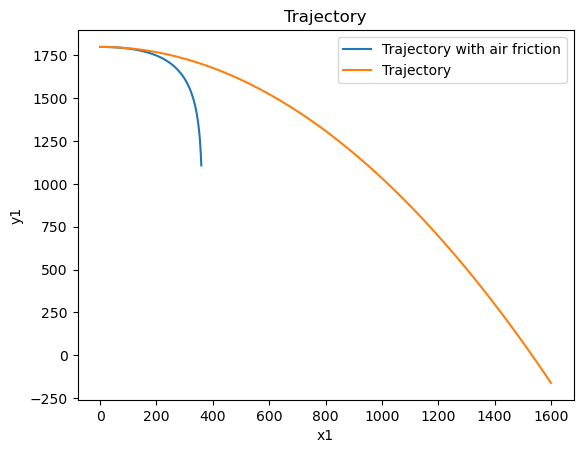

In [436]:
# Trajectory
plt.plot(x1,y1, label="Trajectory with air friction")
plt.plot(x,y, label="Trajectory")

plt.legend()
plt.title("Trajectory")
plt.xlabel("x1")
plt.ylabel("y1")

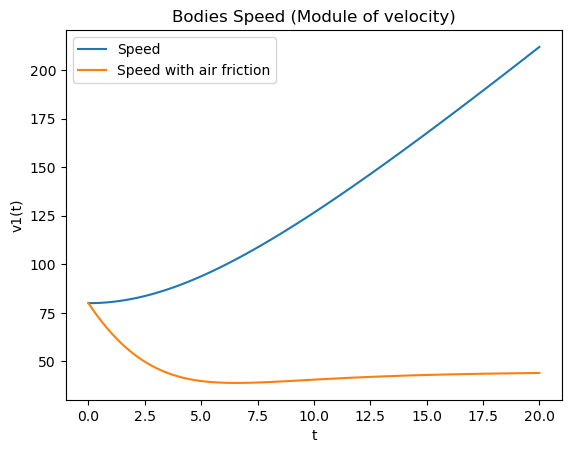

In [467]:
# Speed
speed = np.sqrt(vx**2+vy**2)
speed2 = np.sqrt(vx1**2+vy1**2)
plt.plot(t,speed, label="Speed")
plt.plot(t,speed2, label="Speed with air friction")

plt.title("Bodies Speed (Module of velocity)")
plt.xlabel("t")
plt.ylabel("v1(t)")
plt.legend()